## Logistic Regression Workshop

In [27]:
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv("iris-data-clean.csv")
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [29]:
class_mapping = {
    "Setosa": 0,
    "Virginica": 1,
    "Versicolor": 2
}

df["class"] = df["class"].map(class_mapping)
df.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Filter data

In [30]:
df_0= df[df['class'] == 0]
df_1= df[df['class'] == 1]
df_2= df[df['class'] == 2]

## Plot the data

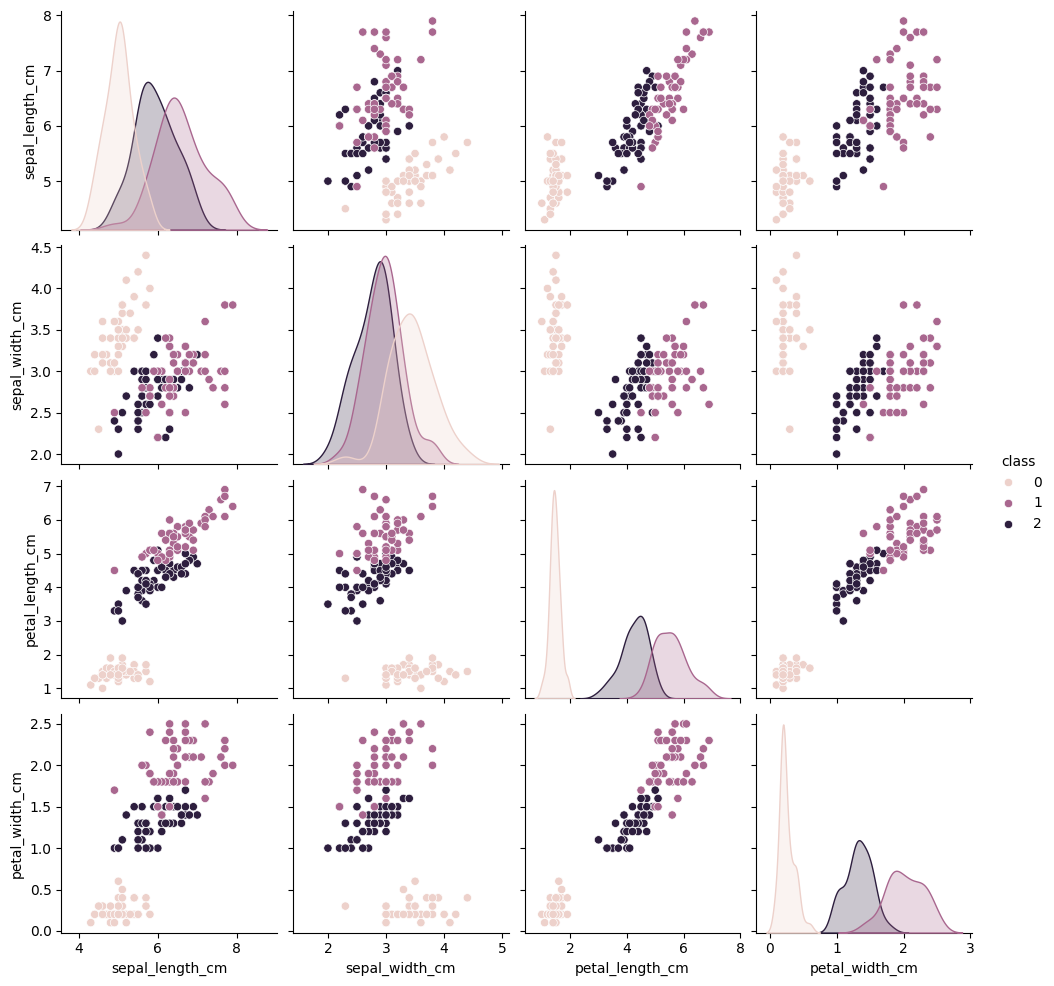

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# since this is a 4 dimensional plot (4 features), we need to use the scatter matrix 
# fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(df_0['sepal_length_cm'], df_0['sepal_width_cm'], df_0['petal_length_cm'], df_0['petal_width_cm'], c = 'red')
# ax.scatter(df_1['sepal_length_cm'], df_1['sepal_width_cm'], df_1['petal_length_cm'], df_1['petal_width_cm'], c = 'blue')
# ax.scatter(df_2['sepal_length_cm'], df_2['sepal_width_cm'], df_2['petal_length_cm'], df_2['petal_width_cm'], c = 'pink')

sns.pairplot(df, hue='class')

## Model training

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

logReg=LogisticRegression()
x = df[['sepal_length_cm', 'sepal_width_cm', 'petal_length_cm', 'petal_width_cm']]
y = df['class']

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

(116, 4)

In [34]:
x_test

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
69,6.4,2.9,4.3,1.3
140,6.7,3.0,5.2,2.3
27,5.2,4.1,1.5,0.1
19,4.8,3.4,1.9,0.2
42,4.6,3.2,1.4,0.2
117,7.7,2.8,6.7,2.0
126,7.9,3.8,6.4,2.0
108,5.7,2.5,5.0,2.0
84,5.5,2.5,4.0,1.3
18,5.1,3.3,1.7,0.5


In [35]:
logReg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


## evaluate model with accuracy score

In [36]:
from sklearn.metrics import accuracy_score

y_pred = logReg.predict(x_test)
data = {
    'y_test':y_test,
    'y_pred': y_pred
}
df_tp = pd.DataFrame(data, columns= ["y_test", "y_pred"])
df_tp

,y_test,y_pred
69,2,2
140,1,1
27,0,0
19,0,0
42,0,0
117,1,1
126,1,1
108,1,1
84,2,2
18,0,0


In [37]:
accuracy_score(y_test, y_pred)

0.9310344827586207

## evaluate with confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix

# print(y_test)
# print('y_pred', y_pred)

print(confusion_matrix(y_test,y_pred))

cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'], index=['Actual Class 0', 'Actual Class 1', 'Actual Class 2'])
cm_df

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1  9]]


,Predicted Class 0,Predicted Class 1,Predicted Class 2
Actual Class 0,8,0,0
Actual Class 1,0,10,1
Actual Class 2,0,1,9


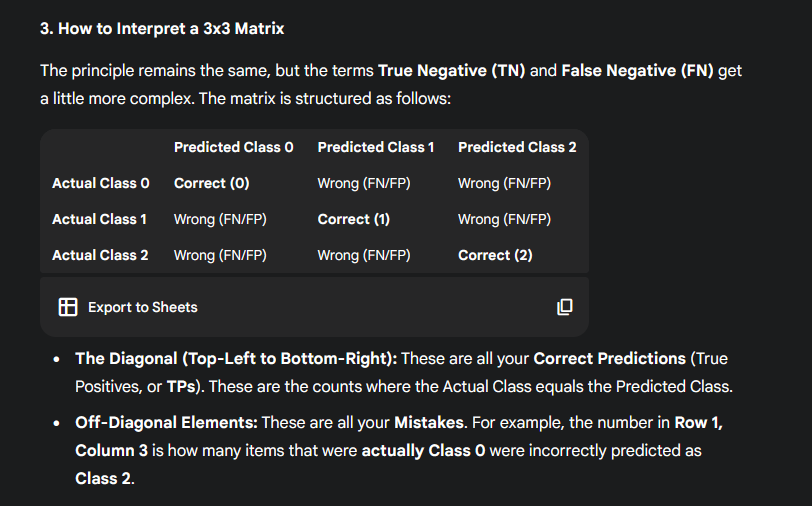

## Redo with 2 features

In [39]:
x = df[['sepal_length_cm', 'petal_length_cm']]
y = df['class']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape

logReg.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
y_pred = logReg.predict(x_test)
data = {
    'y_test':y_test,
    'y_pred': y_pred
}
df_tp = pd.DataFrame(data, columns= ["y_test", "y_pred"])
df_tp

,y_test,y_pred
69,2,2
140,1,1
27,0,0
19,0,0
42,0,0
117,1,1
126,1,1
108,1,1
84,2,2
18,0,0


In [41]:
accuracy_score(y_test, y_pred)

0.896551724137931

In [42]:
print(confusion_matrix(y_test,y_pred))

cm_df = pd.DataFrame(confusion_matrix(y_test,y_pred), columns=['Predicted Class 0', 'Predicted Class 1', 'Predicted Class 2'], index=['Actual Class 0', 'Actual Class 1', 'Actual Class 2'])
cm_df

[[8 0 0]
 [0 9 2]
 [0 1 9]]


,Predicted Class 0,Predicted Class 1,Predicted Class 2
Actual Class 0,8,0,0
Actual Class 1,0,9,2
Actual Class 2,0,1,9
